<a href="https://colab.research.google.com/github/alfariziraju/Praktek-Fuzzy-G211220061/blob/main/UAS_PraktikumFuzzyG211220061.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# --- CELL 1: SETUP & LIBRARY ---
import numpy as np
import matplotlib.pyplot as plt

# Fungsi bantu untuk menggambar grafik keanggotaan (Opsional, agar lebih visual)
def plot_membership(x, ranges, labels, title):
    plt.figure(figsize=(8, 4))
    for i, (y_vals, label) in enumerate(zip(ranges, labels)):
        plt.plot(x, y_vals, label=label, linewidth=2)
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlabel("Nilai Input")
    plt.ylabel("Derajat Keanggotaan (µ)")
    plt.show()

# Fungsi Kurva Matematika (Fuzzy Shapes)
def trapesium(x, a, b, c, d):
    # Mengembalikan nilai array jika input x adalah array (untuk plotting)
    return np.maximum(0, np.minimum(1, np.minimum((x-a)/(b-a + 1e-9), (d-x)/(d-c + 1e-9))))

def segitiga(x, a, b, c):
    return np.maximum(0, np.minimum((x-a)/(b-a + 1e-9), (c-x)/(c-b + 1e-9)))

def linear_turun(x, a, b):
    # Jika x <= a -> 1, Jika x >= b -> 0
    return np.maximum(0, np.minimum(1, (b-x)/(b-a + 1e-9)))

print("Library dan Fungsi siap digunakan.")

Library dan Fungsi siap digunakan.


In [3]:
# --- CELL 2: EKSEKUSI FUZZY LOGIC (KASUS A) ---

# 1. INPUT DATA PASIEN [cite: 55-57]
input_suhu = 38.5      # Derajat Celcius
input_trombosit = 120  # 10^9/L
input_leukosit = 3.8   # 10^9/L

print(f"Data Pasien: Suhu={input_suhu}°C, Trombosit={input_trombosit}, Leukosit={input_leukosit}\n")

# 2. FUZZIFIKASI [cite: 8-26]
# Suhu
mu_suhu_demam = segitiga(input_suhu, 37, 38, 39)     # Range 37-39
mu_suhu_tinggi = trapesium(input_suhu, 38, 41, 45, 45) # Range 38-41

# Trombosit (Rendah < 150)
mu_trom_rendah = linear_turun(input_trombosit, 50, 150)
mu_trom_normal = 1 - mu_trom_rendah

# Leukosit (Rendah < 4)
mu_leuk_rendah = linear_turun(input_leukosit, 3, 4)
mu_leuk_normal = 1 - mu_leuk_rendah

print(f"[1] Hasil Fuzzifikasi:")
print(f"    - Suhu Demam: {mu_suhu_demam:.2f}, Tinggi: {mu_suhu_tinggi:.2f}")
print(f"    - Trombosit Rendah: {mu_trom_rendah:.2f}")
print(f"    - Leukosit Rendah: {mu_leuk_rendah:.2f}")

# 3. INFERENSI (EVALUASI RULE) [cite: 37-47]
# R1: Suhu Tinggi AND Trombosit Rendah AND Leukosit Rendah -> TINGGI
r1 = min(mu_suhu_tinggi, mu_trom_rendah, mu_leuk_rendah)

# R2: Suhu Demam AND Trombosit Rendah -> TINGGI
r2 = min(mu_suhu_demam, mu_trom_rendah)

# R3: Suhu Demam AND Trombosit Normal -> SEDANG
r3 = min(mu_suhu_demam, mu_trom_normal)

# R5: Suhu Tinggi AND Leukosit Normal -> SEDANG
r5 = min(mu_suhu_tinggi, mu_leuk_normal)

# Agregasi Max (Gabungan Rule)
risiko_tinggi = max(r1, r2)
risiko_sedang = max(r3, r5)

print(f"\n[2] Hasil Inferensi (Firing Strength):")
print(f"    - Risiko TINGGI (Max Rule 1, 2): {risiko_tinggi:.2f}")
print(f"    - Risiko SEDANG (Max Rule 3, 5): {risiko_sedang:.2f}")

# 4. DEFUZZIFIKASI (Weighted Average) [cite: 31-35]
# Nilai tengah: Sedang(30-70) -> 50, Tinggi(60-100) -> 80
z_sedang = 50
z_tinggi = 80

pembilang = (risiko_sedang * z_sedang) + (risiko_tinggi * z_tinggi)
penyebut = risiko_sedang + risiko_tinggi

if penyebut > 0:
    score_akhir = pembilang / penyebut
else:
    score_akhir = 0

print(f"\n[3] OUTPUT AKHIR:")
print(f"    Skor Risiko: {score_akhir:.2f}")
if score_akhir > 60:
    print("    Diagnosa: RISIKO TINGGI")
elif score_akhir > 30:
    print("    Diagnosa: RISIKO SEDANG")
else:
    print("    Diagnosa: RISIKO RENDAH")

Data Pasien: Suhu=38.5°C, Trombosit=120, Leukosit=3.8

[1] Hasil Fuzzifikasi:
    - Suhu Demam: 0.50, Tinggi: 0.17
    - Trombosit Rendah: 0.30
    - Leukosit Rendah: 0.20

[2] Hasil Inferensi (Firing Strength):
    - Risiko TINGGI (Max Rule 1, 2): 0.30
    - Risiko SEDANG (Max Rule 3, 5): 0.50

[3] OUTPUT AKHIR:
    Skor Risiko: 61.25
    Diagnosa: RISIKO TINGGI


In [4]:
# --- CELL 3: EKSEKUSI ANFIS (KASUS B) ---

# Fungsi Keanggotaan khusus ANFIS (Trimf)
def anfis_trimf(x, a, b, c):
    return max(0, min((x - a) / (b - a), (c - x) / (c - b)))

# INPUT DATA [cite: 85]
x1 = 60  # Soil Moisture
x2 = 26  # Avg Temp
print(f"Input ANFIS: Soil Moisture={x1}, Avg Temp={x2}\n")

# --- LAYER 1: FUZZIFIKASI [cite: 68-75] ---
# x1 Moisture
mu_A1 = anfis_trimf(x1, 0, 30, 60)   # Low
mu_A2 = anfis_trimf(x1, 40, 70, 100) # High
# x2 Temp
mu_B1 = anfis_trimf(x2, 15, 20, 25)  # Low
mu_B2 = anfis_trimf(x2, 22, 28, 35)  # High

print(f"[Layer 1] Membership:")
print(f"    x1 (Moisture): Low={mu_A1:.2f}, High={mu_A2:.2f}")
print(f"    x2 (Temp)    : Low={mu_B1:.2f}, High={mu_B2:.2f}")

# --- LAYER 2: FIRING STRENGTH [cite: 79-82] ---
w1 = mu_A1 * mu_B1 # Low-Low
w2 = mu_A1 * mu_B2 # Low-High
w3 = mu_A2 * mu_B1 # High-Low
w4 = mu_A2 * mu_B2 # High-High

print(f"\n[Layer 2] Weights (w):")
print(f"    w1={w1:.2f}, w2={w2:.2f}, w3={w3:.2f}, w4={w4:.4f}")

# --- LAYER 3: NORMALISASI ---
total_w = w1 + w2 + w3 + w4
w1_bar = w1 / total_w if total_w != 0 else 0
w2_bar = w2 / total_w if total_w != 0 else 0
w3_bar = w3 / total_w if total_w != 0 else 0
w4_bar = w4 / total_w if total_w != 0 else 0

print(f"\n[Layer 3] Normalized Weights (w_bar):")
print(f"    w4_bar (Rule 4 dominan) = {w4_bar:.2f}")

# --- LAYER 4: KONSEKUEN (LINEAR SUGENO) [cite: 84] ---
# Parameter: p, q, r
p = [0.0692, 0.0698, 0.0585, 0.0505]
q = [0.0461, 0.0390, 0.0183, 0.0318]
r = [0.00231, 0.00139, 0.00084, 0.00115]

# Hitung y = px1 + qx2 + r untuk setiap rule
f_out = []
for i in range(4):
    val = (p[i] * x1) + (q[i] * x2) + r[i]
    f_out.append(val)

print(f"\n[Layer 4] Output Linear Rule 4: {f_out[3]:.4f}")

# --- LAYER 5: OUTPUT FINAL ---
prediksi = (w1_bar * f_out[0]) + (w2_bar * f_out[1]) + (w3_bar * f_out[2]) + (w4_bar * f_out[3])

print(f"\n[HASIL AKHIR] Prediksi Produksi Jagung: {prediksi:.4f} ton/ha")

Input ANFIS: Soil Moisture=60, Avg Temp=26

[Layer 1] Membership:
    x1 (Moisture): Low=0.00, High=0.67
    x2 (Temp)    : Low=0.00, High=0.67

[Layer 2] Weights (w):
    w1=0.00, w2=0.00, w3=0.00, w4=0.4444

[Layer 3] Normalized Weights (w_bar):
    w4_bar (Rule 4 dominan) = 1.00

[Layer 4] Output Linear Rule 4: 3.8580

[HASIL AKHIR] Prediksi Produksi Jagung: 3.8580 ton/ha


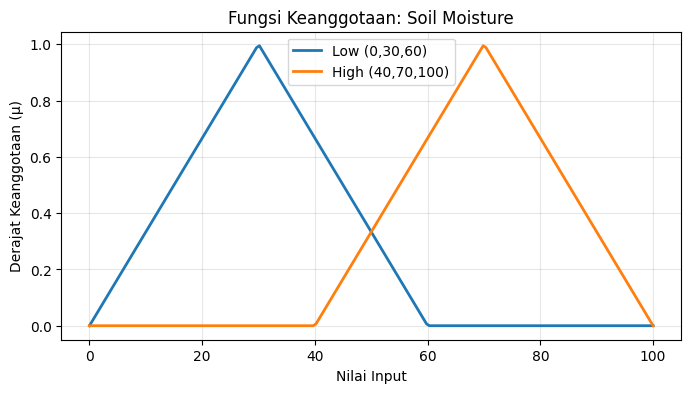

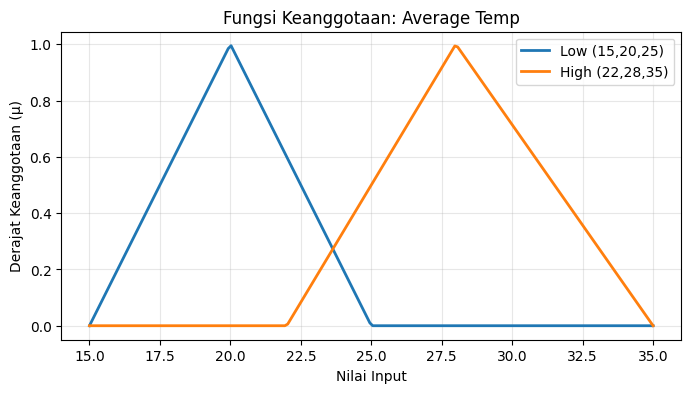

In [5]:
# --- CELL 4: VISUALISASI ---
x_range_moist = np.linspace(0, 100, 200)
x_range_temp = np.linspace(15, 35, 200)

# Generate data untuk plot
y_moist_low = [anfis_trimf(i, 0, 30, 60) for i in x_range_moist]
y_moist_high = [anfis_trimf(i, 40, 70, 100) for i in x_range_moist]

y_temp_low = [anfis_trimf(i, 15, 20, 25) for i in x_range_temp]
y_temp_high = [anfis_trimf(i, 22, 28, 35) for i in x_range_temp]

# Plot Soil Moisture
plot_membership(x_range_moist, [y_moist_low, y_moist_high],
                ["Low (0,30,60)", "High (40,70,100)"],
                "Fungsi Keanggotaan: Soil Moisture")

# Plot Avg Temp
plot_membership(x_range_temp, [y_temp_low, y_temp_high],
                ["Low (15,20,25)", "High (22,28,35)"],
                "Fungsi Keanggotaan: Average Temp")